
# 💎 Diamantanalys för Guldfynd

## Bakgrund
Guldfynd är ett företag specialiserat på smycken av guld och silver. Företaget överväger att utöka sitt sortiment till att även omfatta diamanter. Som dataanalytiker på IT-avdelningen har du fått i uppdrag att analysera ett tillgängligt diamant-dataset för att identifiera insikter som kan vägleda verksamhetens investeringsbeslut.

Syftet:
- Identifiera faktorer som påverkar diamantpriser.
- Förstå fördelningen av olika diamantkvaliteter.
- Skapa en grund för rekommendationer kring sortimentsstrategi.


## Innehållsförteckning
- Bakgrund
- Syftet
- Innehållsförteckning
- Datapreparation

-- Analysen --
- ❓ Biblotek + Code Cleaning
- 🔍 Gruppering
- 🔍 Visualiseringar

Visualiseringar visar:
1. Pris vs Vikt (Carat)
2. Pris per Färg
3. Pris per Klarhet
4. Pris per Slipkvalitet (Cut)
5. Fördelning: Cut
6. Fördelning: Clarity

- 📈 Prisfördelning (Pris x Antal) + (Antal Carat)
- 📊 Sammanfattande Insikter
- 📌 Executive Summary ( Förslag till Guldfynds ledning: )


## Datapreparation
Vi börjar med att ladda in datan, undersöka dess struktur och rensa bort saknade värden för att möjliggöra en pålitlig analys.

## ❓ Biblotek + Code Cleaning

In [ ]:

import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Läs in datan och ta bort rader med saknade värden
df = pd.read_excel('diamonds.xlsx')
df_clean = df.dropna()
cols_to_check = ['carat', 'price', 'x', 'y', 'z']
cols_exist = [col for col in cols_to_check if col in df_clean.columns]

if cols_exist:
    df_clean = df_clean[(df_clean[cols_exist] != 0).all(axis=1)]

antal_före = len(df)
antal_efter = len(df_clean)
print(f"Antal borttagna rader: {antal_före - antal_efter}")
print(f"Antal rader kvar: {antal_efter}")
df_clean.head()

## 🔍 Gruppering

In [ ]:
# Gruppanalyser
avg_price_by_color = df_clean.groupby("color")["price"].mean().sort_index()
avg_price_by_clarity = df_clean.groupby("clarity")["price"].mean().sort_index()
avg_price_by_cut = df_clean.groupby("cut")["price"].mean().sort_index()
cut_mapping = {
        "Ideal": "Excellent",
        "Premium": "Very Good",
        "Very Good": "Good",
        "Good": "Fair",
        "Fair": "Poor"
    }
df_clean["cut_gia"] = df_clean["cut"].map(cut_mapping)
avg_price_by_cut_gia = df_clean.groupby("cut_gia")["price"].mean().sort_index()


In [12]:

# Diskretisera numeriska variabler i 3 grupper
depth_bins = pd.qcut(df_clean["depth"], q=3, labels=["Låg", "Mellan", "Hög"])
depth_counts = depth_bins.value_counts().sort_index()

table_bins = pd.qcut(df_clean["table"], q=3, labels=["Låg", "Mellan", "Hög"])
table_counts = table_bins.value_counts().sort_index()

carat_bins = pd.qcut(df_clean["carat"], q=3, labels=["Låg", "Mellan", "Hög"])
carat_counts = carat_bins.value_counts().sort_index()

cut_counts = df_clean["cut"].value_counts()
clarity_counts = df_clean["clarity"].value_counts()


## 🔎 Visualiseringar

In [ ]:
# Scatter: Pris vs Carat
scatter_trace = go.Scatter(
    x=df_clean["carat"],
    y=df_clean["price"],
    mode='markers',
    marker=dict(opacity=0.4),
    name="Pris vs Vikt"
)

# Pris per Färg
color_map = {
    'D': '#4B9CD3', 'E': '#76B041', 'F': '#FFD700',
    'G': '#FF7F50', 'H': '#D87093', 'I': '#9370DB', 'J': '#A9A9A9'
}
bar_color_trace = go.Bar(
    x=avg_price_by_color.index,
    y=avg_price_by_color.values,
    marker_color=[color_map.get(c, "gray") for c in avg_price_by_color.index],
    name="Pris per Färg"
)

# Pris per Klarhet
bar_clarity_trace = go.Bar(
    x=avg_price_by_clarity.index,
    y=avg_price_by_clarity.values,
    marker_color='silver',
    name="Pris per Klarhet"
)

# Pris per Slipkvalitet
bar_cut_trace = go.Bar(
    x=avg_price_by_cut_gia.index,
    y=avg_price_by_cut_gia.values,
    marker_color='gold',
    name="Pris per Cut"
)

# Pie: Cut
pie_cut_trace = go.Pie(
    labels=cut_counts.index,
    values=cut_counts.values,
    name="Fördelning Cut",
    hole=0.3
)

# Pie: Clarity
pie_clarity_trace = go.Pie(
    labels=clarity_counts.index,
    values=clarity_counts.values,
    name="Fördelning Clarity",
    hole=0.3
)

# Skapa 2x3 grid
fig_grid = make_subplots(
    rows=2, cols=3,
    subplot_titles=[
        "Pris vs Vikt (Carat)", "Pris per Färg", "Pris per Klarhet",
        "Pris per Slipkvalitet", "Fördelning: Cut", "Fördelning: Clarity"
    ],
    specs=[[{"type": "scatter"}, {"type": "bar"}, {"type": "bar"}],
           [{"type": "bar"}, {"type": "domain"}, {"type": "domain"}]]
)

# Lägg till spår i rätt ruta
fig_grid.add_trace(scatter_trace, row=1, col=1)
fig_grid.add_trace(bar_color_trace, row=1, col=2)
fig_grid.add_trace(bar_clarity_trace, row=1, col=3)
fig_grid.add_trace(bar_cut_trace, row=2, col=1)
fig_grid.add_trace(pie_cut_trace, row=2, col=2)
fig_grid.add_trace(pie_clarity_trace, row=2, col=3)

# Anpassa layout
fig_grid.update_layout(
    height=800, width=1200,
    title_text="Diamantanalys – Visualiseringar i Grid",
    template="plotly_dark",
    showlegend=False
)

fig_grid.show()


## 📈 Prisfördelning (Pris x Antal) + (Antal Carat)

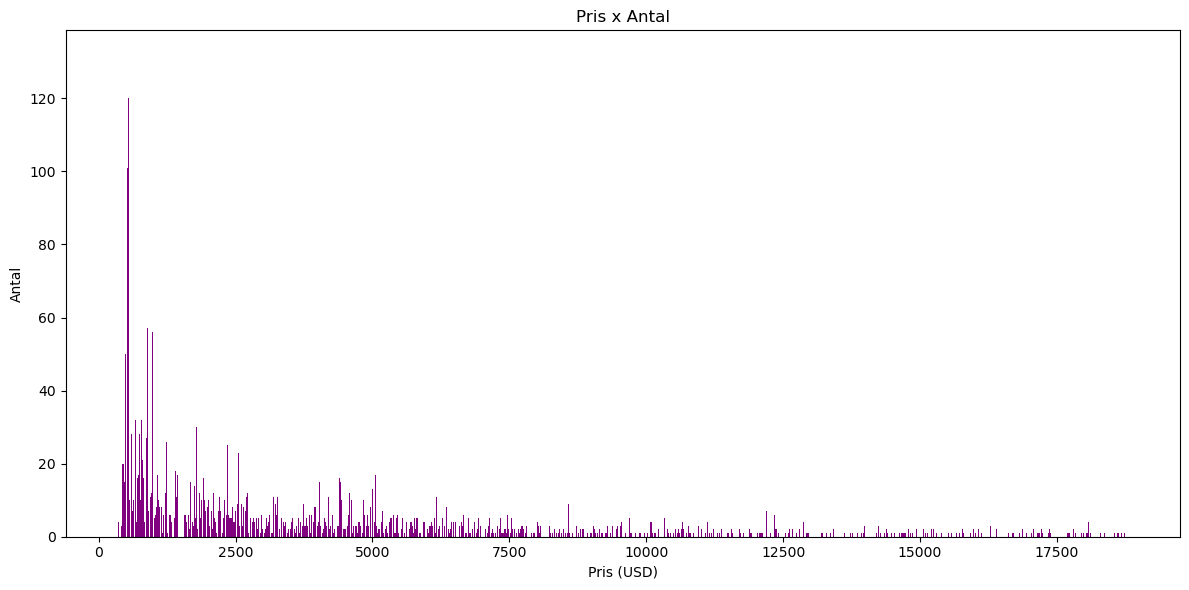

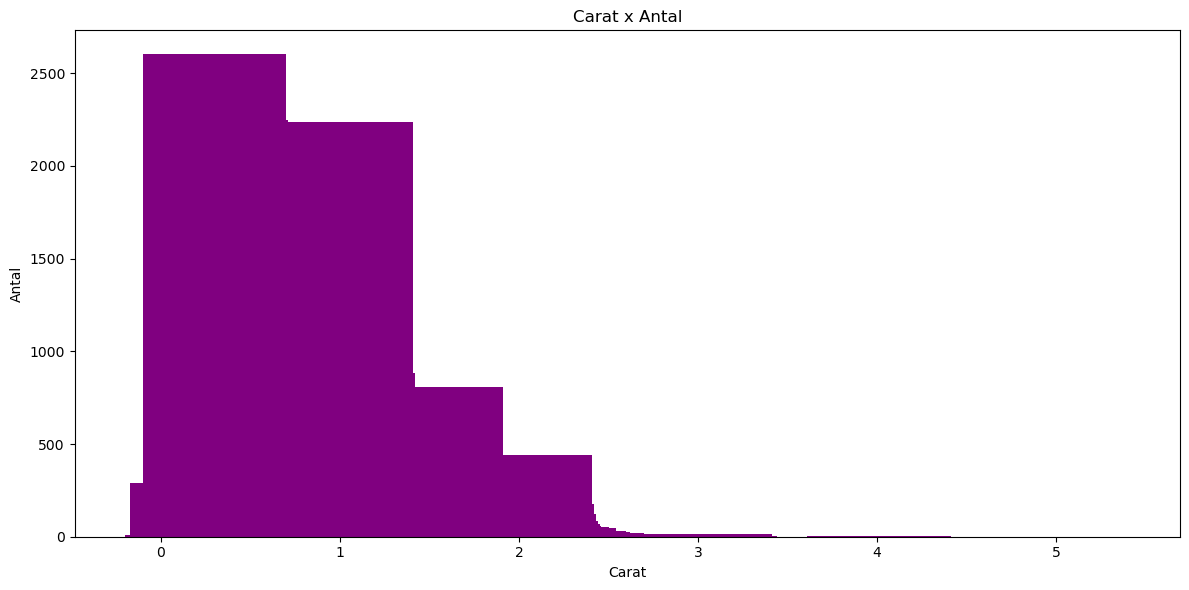

In [29]:
import matplotlib.pyplot as plt

price_distribution = df_clean["price"].value_counts().sort_index()
plt.figure(figsize=(12, 6))
plt.bar(price_distribution.index, price_distribution.values, color='purple')
plt.title("Pris x Antal")
plt.xlabel("Pris (USD)")
plt.ylabel("Antal")
plt.tight_layout()
plt.show()

price_distribution = df_clean["carat"].value_counts().sort_index()
plt.figure(figsize=(12, 6))
plt.bar(price_distribution.index, price_distribution.values, color='purple')
plt.title("Carat x Antal")
plt.xlabel("Carat")
plt.ylabel("Antal")
plt.tight_layout()
plt.show()


## 📊 Sammanfattande insikter

Efter att ha analyserat diamantdatasetet framträder följande centrala observationer:

1. **Carat har starkast koppling till priset**  
   Ju högre carat, desto högre pris – med ett tydligt icke-linjärt samband. Det finns ett särskilt prishopp runt 1.0 carat och uppåt.

2. **Slipkvalitet ("cut") har stor påverkan på priset**  
   Diamanter med högre slipkvalitet (t.ex. "Excellent", "Very Good") tenderar att ha högre pris än motsvarande stenar med sämre slip, även vid samma vikt.

3. **Färg och klarhet påverkar – men mer nyanserat**  
   Bättre färg (närmare D) och hög klarhet (t.ex. IF, VVS1) ger generellt högre priser, men variationen inom kategorierna är betydande.

4. **Större delen av diamanterna ligger i ett "mittsegment"**  
   De flesta diamanter har:
   - Vikt mellan **0.9–1.6 carat**
   - Mellannivåer för bord och djup
   - Medelhög klarhet och färg  
   Detta kan spegla både utbud och efterfrågan på marknaden.

5. **Prisspridning inom kategorier tyder på fler dolda faktorer**  
   Betydande variationer i pris finns även inom samma färg, klarhet eller vikt – vilket indikerar att exempelvis certifiering, fluorescens eller marknadsläge också spelar in.

(För dig som inte vet vad fluorescens är.. 
(AI Förklaring: Fluorescens i diamanter syftar på diamantens förmåga att avge ett synligt ljus (ofta blått) när den utsätts för UV-ljus.))


## 📌 Executive Summary

**Insikter:**
- Prisnivån på diamanter ökar kraftigt med ökad carat-vikt, vilket tyder på att vikt är en avgörande faktor för värdet.
- Slipkvalitet ("cut"), färg och klarhet påverkar priset i varierande grad. Särskilt slipkvaliteten har stark korrelation med prisnivåer.
- Majoriteten av diamanterna i datasetet ligger inom viktspannet 0.7–1.2 carat, vilket indikerar var efterfrågan är som störst på marknaden.
- Fördelningen av djup (depth) och bord (table) ligger också i ett tydligt mellansegment, vilket antyder industristandarder för proportioner.
- Betydande prisskillnader förekommer även inom samma kategori (t.ex. färg eller klarhet), vilket antyder att andra faktorer som certifiering, symmetri eller marknadsläge också påverkar priset.

**Rekommendationer:**
- Fokusera på diamanter mellan 0.7 – 1.2 carat, där marginalerna verkar vara bäst.
- Clarity VS2–SI1 och color G–H ger bäst balans mellan pris och kvalitet.
- "Excellent" och "Very Good" cut rekommenderas då de ofta erbjuder hög kvalitet till rimligt pris.
- "Very Good" cut ger ibland högt pris utan proportionellt högre värde.
- Undvik mycket stora diamanter (>2 carat) i första skedet – dessa är få och dyra.

Denna analys ger ett datadrivet underlag för produkturval, sortimentstrategi och prissättning vid en eventuell expansion till diamantförsäljning.